<a href="https://colab.research.google.com/github/harshv34/data_analytics/blob/main/cyclist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project goal

1. How do annual members and casual riders use Cyclistic bikes differently?
                   

Data source:
https://divvy-tripdata.s3.amazonaws.com/index.html


Documentation of any cleaning or manipulation of data
**Excel**

1.   Adding columns 
      Start_time
      End_Time
      Trip_Duration
      Day
2.   Start_time and End_time column stores the trip start and end time.
3.   Trip_Duration column is populated with the difference between the Start_time and End_time.
4.   The Day column is populated with weekdays using  WEEKDAY() function.
5.   Saved different files in one excel workbook.


Using python for cleaning the data and visulization

Importing libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import NullFormatter

Libraries for importing file from google drive.

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#connecting to google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#file_id = 'https://docs.google.com/spreadsheets/d/1HjKz-lFVS35KpCoXTPGg4hRHSIXlDBhi/edit?usp=share_link&ouid=110390729894590230446&rtpof=true&sd=true' 

file_id = 'https://docs.google.com/spreadsheets/d/18tc25n1VT6TxhG1OFrnNRKuFMPZszVGT/edit?usp=share_link&ouid=110390729894590230446&rtpof=true&sd=true'
download = drive.CreateFile({'id': file_id})


#reading file to dataset and merging all the excel file to create one dataset.
#df = pd.concat(pd.read_excel("/content/drive/MyDrive/cyclist_dataset/cyclist_cleaned data.xlsx", sheet_name=None), ignore_index=True)
df = pd.read_csv("/content/drive/MyDrive/cyclist_dataset/cyclist_merged_data.xlsx")
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,5,7,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Start_time,End_Time,Trip_Duration,Day,Column1
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,2023-01-21 20:05:42,2023-01-21 20:16:33,00:10:51,7.0,NaN
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-10 15:37:36,2023-01-10 15:46:05,00:08:29,3.0,NaN
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,2023-01-02 07:51:57,2023-01-02 08:05:11,00:13:14,2.0,NaN
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-22 10:52:58,2023-01-22 11:01:44,00:08:46,1.0,NaN
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-12 13:58:01,2023-01-12 14:13:20,00:15:19,5.0,NaN


In [ ]:
#Saving merged data to a file
#df.to_csv(r'/content/drive/MyDrive/cyclist_dataset/cyclist_merged_data.xlsx', index=False)


In [ ]:
#removing column with null values
df = df.drop(['Column1'],axis=1)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Start_time,End_Time,Trip_Duration,Day
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,2023-01-21 20:05:42,2023-01-21 20:16:33,00:10:51,7.0
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-10 15:37:36,2023-01-10 15:46:05,00:08:29,3.0
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,2023-01-02 07:51:57,2023-01-02 08:05:11,00:13:14,2.0
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-22 10:52:58,2023-01-22 11:01:44,00:08:46,1.0
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-12 13:58:01,2023-01-12 14:13:20,00:15:19,5.0


In [ ]:
#remoing rows with null values
df_comp=df.dropna()
df_comp.count()

ride_id               4140779
rideable_type         4140779
started_at            4140779
ended_at              4140779
start_station_name    4140779
start_station_id      4140779
end_station_name      4140779
end_station_id        4140779
start_lat             4140779
start_lng             4140779
end_lat               4140779
end_lng               4140779
member_casual         4140779
Start_time            4140779
End_Time              4140779
Trip_Duration         4140779
Day                   4140779
dtype: int64

Descriptive analysis

In [ ]:
# descriptive analysis 
round(df_comp.describe(),2)

,start_lat,start_lng,end_lat,end_lng,Day
count,4140779.00,4140779.00,4140779.00,4140779.00,4140779.00
mean,41.90,-87.64,41.90,-87.64,3.80
std,0.04,0.02,0.04,0.02,2.29
min,41.65,-87.83,41.65,-87.83,-0.00
25%,41.88,-87.66,41.88,-87.66,2.00
50%,41.90,-87.64,41.90,-87.64,4.00
75%,41.93,-87.63,41.93,-87.63,6.00
max,42.06,-87.53,42.07,-87.53,28.66


In [ ]:
#calculating trip duration in minutes
df_comp.ended_at=df_comp.ended_at.astype(np.datetime64)
df_comp.started_at=df_comp.started_at.astype(np.datetime64)
df_comp.Trip_Duration = df_comp.ended_at - df_comp.started_at
df_comp.Trip_Duration =df_comp.Trip_Duration.astype('timedelta64[m]')
data_type=df_comp.dtypes
print(data_type)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
Start_time                    object
End_Time                      object
Trip_Duration                float64
Day                          float64
dtype: object


In [ ]:
#descriptive analysis on trip duration in minutes
avg_trip = round(df_comp.Trip_Duration.describe(), 2)
print(avg_trip)

count    4140779.00
mean          24.19
std          213.53
min        -3891.00
25%            7.00
50%           13.00
75%           24.00
max        54283.00
Name: Trip_Duration, dtype: float64


In [ ]:
# removing rows with negative values in Trip_Duration column
df_comp = df_comp[df_comp['Trip_Duration']> 0]


In [ ]:
#descriptive analysis on trip duration in minutes
avg_trip = round(df_comp.Trip_Duration.describe(), 2)
print(avg_trip)

count    4068423.00
mean          24.62
std          215.39
min            1.00
25%            7.00
50%           13.00
75%           24.00
max        54283.00
Name: Trip_Duration, dtype: float64


On an average cyclist ride cycle for 24.62 minutes.

Now calculating average trip based on member_casual column


In [ ]:
#Descriptive analysis based on member_casual column
avg_trip_drill = round(df_comp.Trip_Duration.groupby(df.member_casual).describe(), 2)
print(avg_trip_drill)

                   count   mean     std  min   25%   50%   75%      max
member_casual                                                          
casual         1658747.0  39.54  328.57  1.0  10.0  19.0  36.0  54283.0
member         2409676.0  14.36   61.25  1.0   6.0  10.0  18.0  41271.0


Casual have higher average trip_duration then members.We are considering trip duration instead of calculating the distance based on longitude and latitutde as longitude and latitude gives displacement but not actual distance covered by cyclist. 

In [ ]:
#Updating days column with day name
df_comp.Day = df_comp['started_at'].dt.day_name()
df_comp = df_comp.dropna()
df_comp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Start_time,End_Time,Trip_Duration,Day
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,2023-01-21 20:05:42,2023-01-21 20:16:33,10.0,Saturday
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-10 15:37:36,2023-01-10 15:46:05,8.0,Tuesday
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,2023-01-02 07:51:57,2023-01-02 08:05:11,13.0,Monday
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-22 10:52:58,2023-01-22 11:01:44,8.0,Sunday
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-12 13:58:01,2023-01-12 14:13:20,15.0,Thursday


In [ ]:
# Finding weekday-wise usage for cyclist
daywise_drilldown = df_comp.groupby(['member_casual', 'Day']).Trip_Duration.sum()
daywise_drilldown = daywise_drilldown.reset_index()
print(daywise_drilldown)

   member_casual        Day  Trip_Duration
0         casual     Friday      8978682.0
1         casual     Monday      7339986.0
2         casual   Saturday     15844283.0
3         casual     Sunday     13763869.0
4         casual   Thursday      7473191.0
5         casual    Tuesday      5766147.0
6         casual  Wednesday      6420682.0
7         member     Friday      4993411.0
8         member     Monday      4554262.0
9         member   Saturday      5801789.0
10        member     Sunday      4928709.0
11        member   Thursday      4937233.0
12        member    Tuesday      4513875.0
13        member  Wednesday      4864922.0


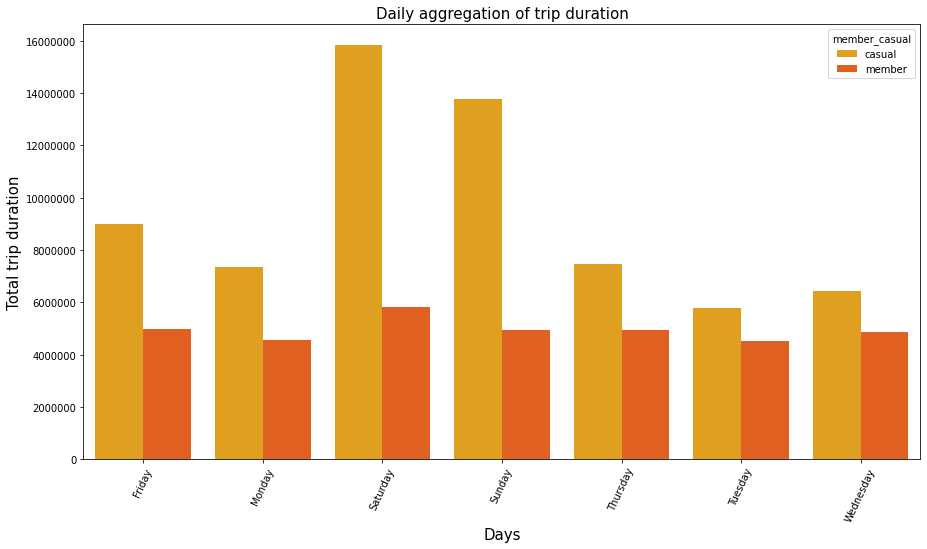

In [ ]:
#Ploting graph for trip duration based on week days
fig, ax = plt.subplots(figsize=(15, 8))

sb.barplot(x="Day",
           y="Trip_Duration",
           hue="member_casual",
           data=daywise_drilldown,
           palette = "autumn_r")

ax.set_xlabel("Days", fontsize = 15)
ax.set_ylabel("Total trip duration", fontsize = 15)
ax.set_title('Daily aggregation of trip duration', fontsize = 15)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.xticks(rotation=65)

plt.show()

The comparison above shows that the members trip-duration is consistent though out the week. But casuals trip_duration significantly increases during weekends.


In [ ]:
#Creating new month, year and month+year column
df_comp['month'] = df_comp['started_at'].dt.month_name()# + " " + 
df_comp['year'] = pd.DatetimeIndex(df_comp['started_at']).year
df_comp['mon_yr'] = df_comp['month'] +" " + df_comp['year'].astype(str)
df_comp['month_num'] = pd.DatetimeIndex(df_comp['started_at']).month
df_comp = df_comp.sort_values(by='started_at')
df_comp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,Start_time,End_Time,Trip_Duration,Day,month,year,mon_yr,month_num
4983893,7C754A74F043C1C3,docked_bike,2020-05-01 00:02:07,2020-05-01 00:20:54,Michigan Ave & Washington St,43,Wentworth Ave & 24th St (Temp),132.0,41.8840,-87.6247,...,-87.6321,member,2020-05-01 00:02:07,2020-05-01 00:20:54,18.0,Friday,May,2020,May 2020,5
4888921,9BD98D6E5FBC7058,docked_bike,2020-05-01 00:04:44,2020-05-01 00:15:54,Wilton Ave & Belmont Ave,117,Broadway & Barry Ave,300.0,41.9402,-87.6530,...,-87.6441,casual,2020-05-01 00:04:44,2020-05-01 00:15:54,11.0,Friday,May,2020,May 2020,5
5005899,11190B9379C30638,docked_bike,2020-05-01 00:05:50,2020-05-01 00:21:23,Damen Ave & Wellington Ave,162,Dayton St & North Ave,60.0,41.9359,-87.6784,...,-87.6494,casual,2020-05-01 00:05:50,2020-05-01 00:21:23,15.0,Friday,May,2020,May 2020,5
4948389,3FEA7C1E9B5E505B,docked_bike,2020-05-01 00:07:13,2020-05-01 00:30:46,St. Clair St & Erie St,211,St. Clair St & Erie St,211.0,41.8944,-87.6227,...,-87.6227,casual,2020-05-01 00:07:13,2020-05-01 00:30:46,23.0,Friday,May,2020,May 2020,5
4893173,E76405FC49708E37,docked_bike,2020-05-01 00:07:49,2020-05-01 00:13:03,Damen Ave & Sunnyside Ave,316,Western Ave & Leland Ave,239.0,41.9633,-87.6793,...,-87.6884,casual,2020-05-01 00:07:49,2020-05-01 00:13:03,5.0,Friday,May,2020,May 2020,5


In [ ]:
#montwise and yearwise distribution of trip duration
monthwise_drilldown = df_comp.groupby(['member_casual', 'year', 'month_num','mon_yr']).Trip_Duration.sum()
monthwise_drilldown = monthwise_drilldown.reset_index()
print(monthwise_drilldown)


   member_casual  year  month_num          mon_yr  Trip_Duration
0         casual  2020          5        May 2020      4345050.0
1         casual  2020          6       June 2020      7831115.0
2         casual  2020          7       July 2020     15764177.0
3         casual  2020          8     August 2020     12338354.0
4         casual  2020          9  September 2020      8142855.0
5         casual  2020         10    October 2020      3768672.0
6         casual  2020         11   November 2020      2403242.0
7         casual  2021         12   December 2021      1097821.0
8         casual  2022          5        May 2022      5993968.0
9         casual  2022         10    October 2022      3023289.0
10        casual  2022         12   December 2022       452146.0
11        casual  2023          1    January 2023       426151.0
12        member  2020          5        May 2020      2159773.0
13        member  2020          6       June 2020      3388705.0
14        member  2020   

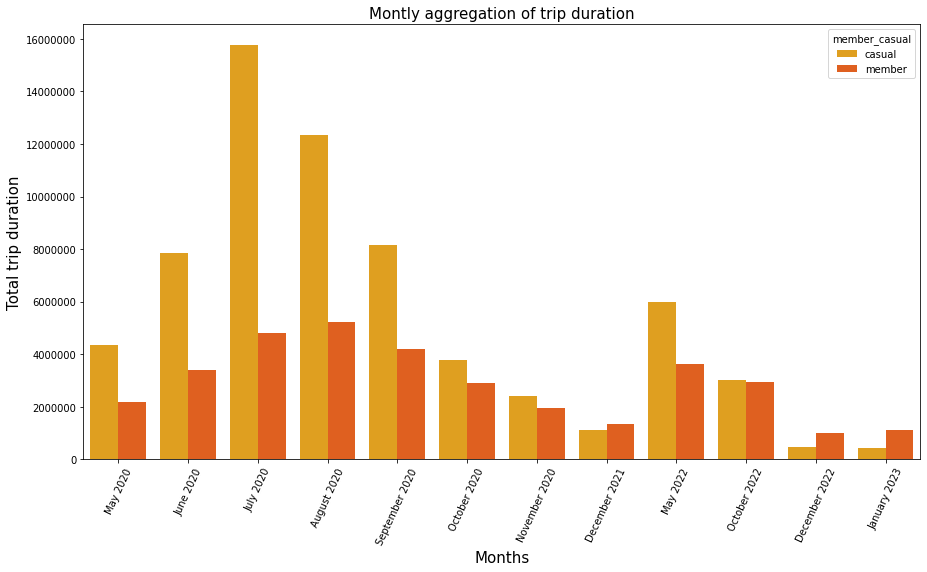

In [ ]:
#graph for monthwise distribution
fig, ax = plt.subplots(figsize=(15, 8))

sb.barplot(x="mon_yr",
           y="Trip_Duration",
           hue="member_casual",
           data=monthwise_drilldown,
           palette = "autumn_r")

ax.set_xlabel("Months", fontsize = 15)
ax.set_ylabel("Total trip duration", fontsize = 15)
ax.set_title('Montly aggregation of trip duration', fontsize = 15)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.xticks(rotation=65)
plt.show()


We can clearly see that the cyclist demand is more during may, june, july, august compared to other months. The graph shows that the trip_duration of casual is greater than memebers.

Also, dataset is missing data of some months. Which might corrupt the result of analysis.



In [ ]:
#Aggrerating bike usage based on type
type_drilldown = df_comp.groupby(['member_casual', 'rideable_type']).Trip_Duration.count()
type_drilldown = type_drilldown.reset_index()
print(type_drilldown)

  member_casual  rideable_type  Trip_Duration
0        casual   classic_bike         229944
1        casual    docked_bike        1101604
2        casual  electric_bike         327199
3        member   classic_bike         558974
4        member    docked_bike        1341918
5        member  electric_bike         508784


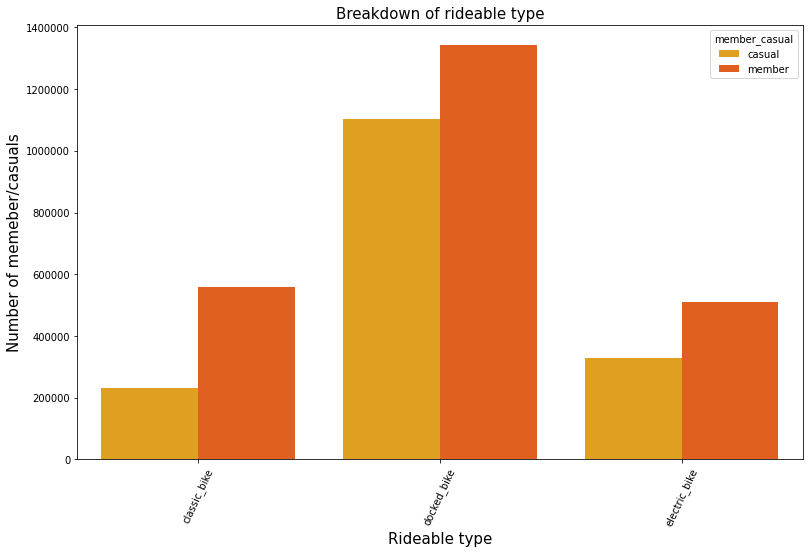

In [ ]:
#Ploting graph for bike based usage based on type
fig, ax = plt.subplots(figsize=(13, 8))

sb.barplot(x="rideable_type",
           y="Trip_Duration",
           hue="member_casual",
           data=type_drilldown,
           palette = "autumn_r")

ax.set_xlabel("Rideable type", fontsize = 15)
ax.set_ylabel("Number of memeber/casuals", fontsize = 15)
ax.set_title('Breakdown of rideable type', fontsize = 15)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.xticks(rotation=65)
plt.show()

Docker bike is most used bike by both casuals and members. Although total trip count of members is greater then casuals in all rideable types.


In [ ]:
#most used start station by casuals
start_station = df_comp[df_comp['member_casual']== 'casual'].groupby(['member_casual','start_station_name']).Trip_Duration.count().sort_values(ascending=False).nlargest(10)
start_station = start_station.reset_index()
print(start_station)

  member_casual          start_station_name  Trip_Duration
0        casual     Streeter Dr & Grand Ave          36813
1        casual             Millennium Park          23298
2        casual       Michigan Ave & Oak St          17744
3        casual   Lake Shore Dr & Monroe St          17686
4        casual         Theater on the Lake          17413
5        casual  Indiana Ave & Roosevelt Rd          15104
6        casual              Shedd Aquarium          14039
7        casual           Clark St & Elm St          13635
8        casual      Michigan Ave & Lake St          13025
9        casual       Wells St & Concord Ln          12807


In [ ]:
#most used start station by members
start_station = df_comp[df_comp['member_casual']== 'member'].groupby(['member_casual','start_station_name']).Trip_Duration.count().sort_values(ascending=False).nlargest(10)
start_station = start_station.reset_index()
print(start_station)

  member_casual        start_station_name  Trip_Duration
0        member         Clark St & Elm St          23049
1        member  Kingsbury St & Kinzie St          18856
2        member     Wells St & Concord Ln          18307
3        member      Broadway & Barry Ave          17769
4        member    St. Clair St & Erie St          17222
5        member         Wells St & Elm St          16912
6        member     Dearborn St & Erie St          16867
7        member       Theater on the Lake          16249
8        member       Wells St & Huron St          16176
9        member   Clark St & Armitage Ave          15872


In [ ]:
#distribution of total rides booked 
percent_member = round(df_comp[df_comp['member_casual']== 'member'].count()*100/df_comp['member_casual'].count(),2)
percent_casual = round(df_comp[df_comp['member_casual']== 'casual'].count()*100/df_comp['member_casual'].count(),2)
print("Total rides:" + str(df_comp['member_casual'].count()))
print("Total rides done by casuals:" + str(df_comp[df_comp['member_casual']== 'casual'].count()[1]))
print("Total rides done by members:" + str(df_comp[df_comp['member_casual']== 'member'].count()[1]))
print("Percentage of rides done by causal:" + str(percent_casual[1]))
print("Percentage of rides done by member:" + str(percent_member[1]))

Total rides:4068423
Total rides done by casuals:1658747
Total rides done by members:2409676
Percentage of rides done by causal:40.77
Percentage of rides done by member:59.23


In [ ]:
#Division of trip_duration between casuals and members
trip_member = round(df_comp.loc[df_comp['member_casual']== 'member', 'Trip_Duration'].sum()*100/df_comp['Trip_Duration'].sum(),2)
trip_casual = round(df_comp.loc[df_comp['member_casual']== 'casual', 'Trip_Duration'].sum()*100/df_comp['Trip_Duration'].sum(),2)
print("Total trip duration:" + str(df_comp['Trip_Duration'].sum()))
print("Total trip duration of casuals:" + str(df_comp.loc[df_comp['member_casual']== 'casual', 'Trip_Duration'].sum()))
print("Total trip duration of members:" + str(df_comp.loc[df_comp['member_casual']== 'member', 'Trip_Duration'].sum()))
print("Percentage of casual trip duration out of total trip duration:" + str(trip_casual))
print("Percentage of members trip duration out of total trip duration:" + str(trip_member))


Total trip duration:100181041.0
Total trip duration of casuals:65586840.0
Total trip duration of members:34594201.0
Percentage of casual trip duration out of total trip duration:65.47
Percentage of members trip duration out of total trip duration:34.53


In [ ]:
#Pie-chart data
pie_duration_data = [trip_casual,trip_member]
pie_count_data = [percent_casual[1], percent_member[1]]
pie_key = ["Casuals", "Members"]
explode = [0, 0.1]


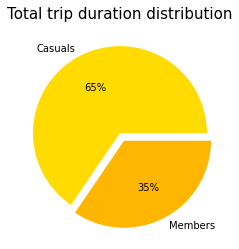

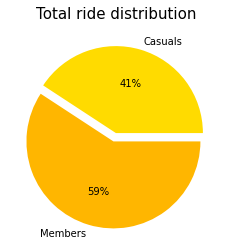

In [ ]:
#Plotting Pie chart to compare total ride and totaltrip duration
palette_color = sb.color_palette('autumn_r')
plt.title("Total trip duration distribution",fontsize = 15)
plt.pie(pie_duration_data, labels=pie_key, colors=palette_color, explode=explode, autopct='%.0f%%')
plt.show()
plt.title("Total ride distribution",fontsize = 15)
plt.pie(pie_count_data, labels=pie_key, colors=palette_color, explode=explode, autopct='%.0f%%')
plt.show()

Member's make more trips than casual's but the total_trip duration of casual's is more than member's

In [ ]:
df.to_csv(r'/content/drive/MyDrive/cyclist_dataset/cyclist_final_data.xlsx', index=False)


Summary of analysis


1. On average cyclist ride cycles for 24.62 minutes.
2. Descriptive analysis based on member_casual column
    https://colab.research.google.com/drive/1zGWvVnB53NVj3_g8FK_yt1AqwaV2XQHJ#scrollTo=TOnUnQDvssjC&line=2&uniqifier=1

3. The member's trip duration is consistent though out the week. But casual’s trip_duration significantly increases during weekends.
4. cyclist demand grows during May, June, July, and August compared to other months. The graph shows that the trip duration of casual is greater than member.
Also, the dataset is missing data for some months. Which might corrupt the result of the analysis.
5. Docker bike is the most used bike by both casuals and members. Although the total trip count of members is greater than casuals in all rideable types.
6. Member’s make more trips than Casual's but the total_trip duration of casual's is more than member's.




